In [18]:
library(dplyr)
library(stringr)

#help(package = "dplyr")
#help(package = "stringr")

In [19]:
train <- read.csv("data/titanic/titanic_train.csv", stringsAsFactors = FALSE)
str(train)

head(train, n=10)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C


### Fares that Equal Zero
Let's dive deep into fares that are 0

In [20]:
zero.fare <- train %>%  filter(Fare == 0.0)
zero.fare

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,,S
264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NA,0,0,239853,0,,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NA,0,0,239853,0,,S
467,0,2,"Campbell, Mr. William",male,NA,0,0,239853,0,,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NA,0,0,239854,0,,S
598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,,S
634,0,1,"Parr, Mr. William Henry Marsh",male,NA,0,0,112052,0,,S


In [21]:
# Let's get the totals by Pclass
zero.fare.pclass <- zero.fare %>% group_by(Pclass) %>% summarize(Total = n()) %>% arrange(desc(Total))
zero.fare.pclass

Pclass,Total
2,6
1,5
3,4


In [22]:
train <- train %>% mutate(Title = str_extract(Name, "[a-zA-Z]+\\."))
train

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr.
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr.
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,Master.
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs.
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs.


In [23]:
titles.lookup <- data.frame(Title = c("Mr.", "Capt.", "Col.", "Don.", "Dr.",
                                      "Jonkheer.", "Major.", "Rev.", "Sir.",
                                      "Mrs.", "Dona.", "Lady.", "Mme.", 
                                      "Countess.", 
                                      "Miss.", "Mlle.", "Ms.",
                                      "Master."),
                            New.Title = c(rep("Mr.", 9),
                                          rep("Mrs.", 5),
                                          rep("Miss.", 3),
                                          "Master."),
                            stringsAsFactors = FALSE)
titles.lookup

Title,New.Title
Mr.,Mr.
Capt.,Mr.
Col.,Mr.
Don.,Mr.
Dr.,Mr.
Jonkheer.,Mr.
Major.,Mr.
Rev.,Mr.
Sir.,Mr.
Mrs.,Mrs.


In [24]:
# Replace Titles using lookup table
train <- train %>% left_join(titles.lookup, by = "Title")
train

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,New.Title
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr.,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss.,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs.,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr.,Mr.
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr.,Mr.
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.,Mr.
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,Master.,Master.
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs.,Mrs.
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs.,Mrs.


In [25]:
# Get rid of old title
train <- train %>% mutate(Title = New.Title) %>% select(-New.Title)
train

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr.
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr.
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,Master.
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs.
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs.


In [29]:
# check and see if genders and titles match up
train %>%
  filter((Sex == "female" & (Title == "Mr." | Title == "Master.")) |
           (Sex == "male" & (Title == "Mrs." | Title == "Miss.")))


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
797,1,1,"Leader, Dr. Alice (Farnham)",female,49,0,0,17465,25.9292,D17,S,Mr.


In [31]:
train$Title[train$PassengerId == 797] <- "Mrs."

In [35]:
table(train$Title)


Master.   Miss.     Mr.    Mrs. 
     40     185     537     129 

In [38]:
mr.fare.stats <- train %>%
  filter(Title == "Mr.") %>%
  group_by(Pclass) %>%
  summarize(Fare.Min = min(Fare),
            Fare.Max = max(Fare),
            Fare.Mean = mean(Fare),
            Fare.Median = median(Fare),
            Fare.Var = var(Fare),
            Fare.SD = sd(Fare),
            Fare.IQR = IQR(Fare))
mr.fare.stats

Pclass,Fare.Min,Fare.Max,Fare.Mean,Fare.Median,Fare.Var,Fare.SD,Fare.IQR
1,0,512.3292,65.95109,39.6000,6079.2712,77.96968,49.28755
2,0,73.5000,19.05412,13.0000,230.8936,15.19518,14.50000
3,0,69.5500,11.29976,7.8958,109.0203,10.44128,0.91665


In [40]:
#======================================================================
# Create "tracking feature" for those records that were originally
# had 0.00 for the Fare variable
#
train$Fare.Zero <- ifelse(train$Fare == 0.0, "Y", "N")
train

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare.Zero
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr.,N
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.,N
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss.,N
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs.,N
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr.,N
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr.,N
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.,N
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,Master.,N
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs.,N
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs.,N


In [42]:
# Create lookup table for zero fare values with median
#
zero.fare.lookup <- train %>%
  filter(Title == "Mr.") %>%
  group_by(Pclass, Title) %>%
  summarize(New.Fare = median(Fare))
zero.fare.lookup


Pclass,Title,New.Fare
1,Mr.,39.6000
2,Mr.,13.0000
3,Mr.,7.8958


In [44]:
#======================================================================
# Impute the zero fares using the lookup table
#
train <- train %>%
  left_join(zero.fare.lookup, by = c("Pclass", "Title")) %>%
  mutate(Fare = ifelse(Fare == 0.0, New.Fare, Fare)) %>%
  select(-New.Fare)
train


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare.Zero
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr.,N
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.,N
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss.,N
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs.,N
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr.,N
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr.,N
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.,N
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,Master.,N
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs.,N
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs.,N


In [45]:
#======================================================================
# Take a closer look at the Age variable all-up
#
age.stats <- train %>%
  group_by(Pclass, Title) %>%
  summarize(Age.Min = min(Age, na.rm = TRUE),
            Age.Max = max(Age, na.rm = TRUE),
            Age.Mean = mean(Age, na.rm = TRUE),
            Age.Median = median(Age, na.rm = TRUE),
            Age.NA.Count = sum(is.na(Age)),
            Age.Var = var(Age, na.rm = TRUE),
            Age.SD = sd(Age, na.rm = TRUE),
            Age.IQR = IQR(Age, na.rm = TRUE)) %>%
  arrange(Title, Pclass)
age.stats

table(train$Pclass)

Pclass,Title,Age.Min,Age.Max,Age.Mean,Age.Median,Age.NA.Count,Age.Var,Age.SD,Age.IQR
1,Master.,0.92,11,5.306667,4.0,0,26.682133,5.165475,5.04
2,Master.,0.67,8,2.258889,1.0,0,5.487936,2.342634,2.17
3,Master.,0.42,12,5.350833,4.0,4,12.914017,3.593608,7.00
1,Miss.,2.00,63,29.744681,30.0,1,159.498612,12.629276,14.50
2,Miss.,2.00,50,22.560606,24.0,2,174.246212,13.200235,17.00
3,Miss.,0.75,45,16.123188,18.0,33,94.037910,9.697315,13.00
1,Mr.,17.00,80,42.382653,42.0,21,194.493820,13.946104,20.00
2,Mr.,16.00,70,33.588889,31.0,9,150.261673,12.258127,14.00
3,Mr.,11.00,74,28.724891,26.0,90,110.059948,10.490946,13.00
1,Mrs.,17.00,62,40.631579,41.5,8,155.049787,12.451899,14.75



  1   2   3 
216 184 491 

In [52]:
# Create missing age dataframe
train$Age.Missing <- ifelse(is.na(train$Age), "Y", "N")

#======================================================================
# Create lookup table

age.lookup <- age.stats %>%
  select(Pclass, Title, Age.Mean, Age.Median)
age.lookup

#======================================================================
# Impute missing ages using lookup table

train <- train %>%
  left_join(age.lookup, by = c("Pclass", "Title")) %>%
  mutate(Age = ifelse(Age.Missing == "Y", 
                      ifelse(Title == "Miss." & Pclass == "3", 
                             Age.Median, Age.Mean), 
                      Age)) %>%
  select(-Age.Median, -Age.Mean)

train

quantile(train$Age, probs = seq(0.05, 1, 0.05))

Pclass,Title,Age.Mean,Age.Median
1,Master.,5.306667,4.0
2,Master.,2.258889,1.0
3,Master.,5.350833,4.0
1,Miss.,29.744681,30.0
2,Miss.,22.560606,24.0
3,Miss.,16.123188,18.0
1,Mr.,42.382653,42.0
2,Mr.,33.588889,31.0
3,Mr.,28.724891,26.0
1,Mrs.,40.631579,41.5


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare.Zero,Age.Missing
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,,S,Mr.,N,N
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.2833,C85,C,Mrs.,N,N
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,,S,Miss.,N,N
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Mrs.,N,N
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,,S,Mr.,N,N
6,0,3,"Moran, Mr. James",male,28.72489,0,0,330877,8.4583,,Q,Mr.,N,N
7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,Mr.,N,N
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,,S,Master.,N,N
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,,S,Mrs.,N,N
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,,C,Mrs.,N,N


5%       10%       15%       20%       25%       30%       35%       40% 
 5.350833 16.000000 18.000000 19.000000 21.000000 22.000000 24.000000 26.000000 
      45%       50%       55%       60%       65%       70%       75%       80% 
28.250000 28.724891 28.724891 30.000000 33.000000 34.000000 36.750000 40.500000 
      85%       90%       95%      100% 
42.382653 47.000000 54.000000 80.000000

In [54]:
#======================================================================
# Create Ticket-based features
#
ticket.lookup <- train %>%
  group_by(Ticket) %>%
  summarize(Group.Count = n(),
            Avg.Fare = max(Fare) / n(),
            Female.Count = sum(Sex == "female"),
            Male.Count = sum(Sex == "male"),
            Child.Count = sum(Age < 18),
            Elderly.Count = sum(Age > 54.0),
            Female.Ratio = sum(Sex == "female") / n(),
            Male.Ratio = sum(Sex == "male") / n(),
            Child.Ratio = sum(Age < 18) / n(),
            Elderly.Ratio = sum(Age > 54.0) / n(),
            Female.Child.Ratio = (sum(Age < 18) + 
                                  sum(Sex == "female" & Age >= 18)) / n(),
            Min.Age = min(Age),
            Max.Age = max(Age))
ticket.lookup


#======================================================================
# Double-check our work
#
ticket.lookup %>% filter(Ticket == "3101295")

train %>% filter(Ticket == "3101295")



#======================================================================
# Populate training data via lookup table
#
train <- train %>%
  left_join(ticket.lookup, by = "Ticket")
train %>% filter(Ticket == "3101295")



Ticket,Group.Count,Avg.Fare,Female.Count,Male.Count,Child.Count,Elderly.Count,Female.Ratio,Male.Ratio,Child.Ratio,Elderly.Ratio,Female.Child.Ratio,Min.Age,Max.Age
110152,3,28.83333,3,0,1,0,1.0000000,0.0000000,0.3333333,0,1.0000000,16.00000,33.00000
110413,3,26.55000,2,1,0,0,0.6666667,0.3333333,0.0000000,0,0.6666667,18.00000,52.00000
110465,2,26.00000,0,2,0,0,0.0000000,1.0000000,0.0000000,0,0.0000000,42.38265,47.00000
110564,1,26.55000,0,1,0,0,0.0000000,1.0000000,0.0000000,0,0.0000000,28.00000,28.00000
110813,1,75.25000,1,0,0,1,1.0000000,0.0000000,0.0000000,1,1.0000000,60.00000,60.00000
111240,1,33.50000,0,1,0,1,0.0000000,1.0000000,0.0000000,1,0.0000000,61.00000,61.00000
111320,1,38.50000,0,1,0,0,0.0000000,1.0000000,0.0000000,0,0.0000000,47.00000,47.00000
111361,2,28.98960,2,0,1,0,1.0000000,0.0000000,0.5000000,0,1.0000000,16.00000,44.00000
111369,1,30.00000,0,1,0,0,0.0000000,1.0000000,0.0000000,0,0.0000000,26.00000,26.00000
111426,1,26.55000,0,1,0,0,0.0000000,1.0000000,0.0000000,0,0.0000000,35.00000,35.00000


Ticket,Group.Count,Avg.Fare,Female.Count,Male.Count,Child.Count,Elderly.Count,Female.Ratio,Male.Ratio,Child.Ratio,Elderly.Ratio,Female.Child.Ratio,Min.Age,Max.Age
3101295,6,6.614583,1,5,5,0,0.1666667,0.8333333,0.8333333,0,1,1,41


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare.Zero,Age.Missing
51,0,3,"Panula, Master. Juha Niilo",male,7,4,1,3101295,39.6875,,S,Master.,N,N
165,0,3,"Panula, Master. Eino Viljami",male,1,4,1,3101295,39.6875,,S,Master.,N,N
267,0,3,"Panula, Mr. Ernesti Arvid",male,16,4,1,3101295,39.6875,,S,Mr.,N,N
639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41,0,5,3101295,39.6875,,S,Mrs.,N,N
687,0,3,"Panula, Mr. Jaako Arnold",male,14,4,1,3101295,39.6875,,S,Mr.,N,N
825,0,3,"Panula, Master. Urho Abraham",male,2,4,1,3101295,39.6875,,S,Master.,N,N


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Male.Count,Child.Count,Elderly.Count,Female.Ratio,Male.Ratio,Child.Ratio,Elderly.Ratio,Female.Child.Ratio,Min.Age,Max.Age
51,0,3,"Panula, Master. Juha Niilo",male,7,4,1,3101295,39.6875,...,5,5,0,0.1666667,0.8333333,0.8333333,0,1,1,41
165,0,3,"Panula, Master. Eino Viljami",male,1,4,1,3101295,39.6875,...,5,5,0,0.1666667,0.8333333,0.8333333,0,1,1,41
267,0,3,"Panula, Mr. Ernesti Arvid",male,16,4,1,3101295,39.6875,...,5,5,0,0.1666667,0.8333333,0.8333333,0,1,1,41
639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41,0,5,3101295,39.6875,...,5,5,0,0.1666667,0.8333333,0.8333333,0,1,1,41
687,0,3,"Panula, Mr. Jaako Arnold",male,14,4,1,3101295,39.6875,...,5,5,0,0.1666667,0.8333333,0.8333333,0,1,1,41
825,0,3,"Panula, Master. Urho Abraham",male,2,4,1,3101295,39.6875,...,5,5,0,0.1666667,0.8333333,0.8333333,0,1,1,41


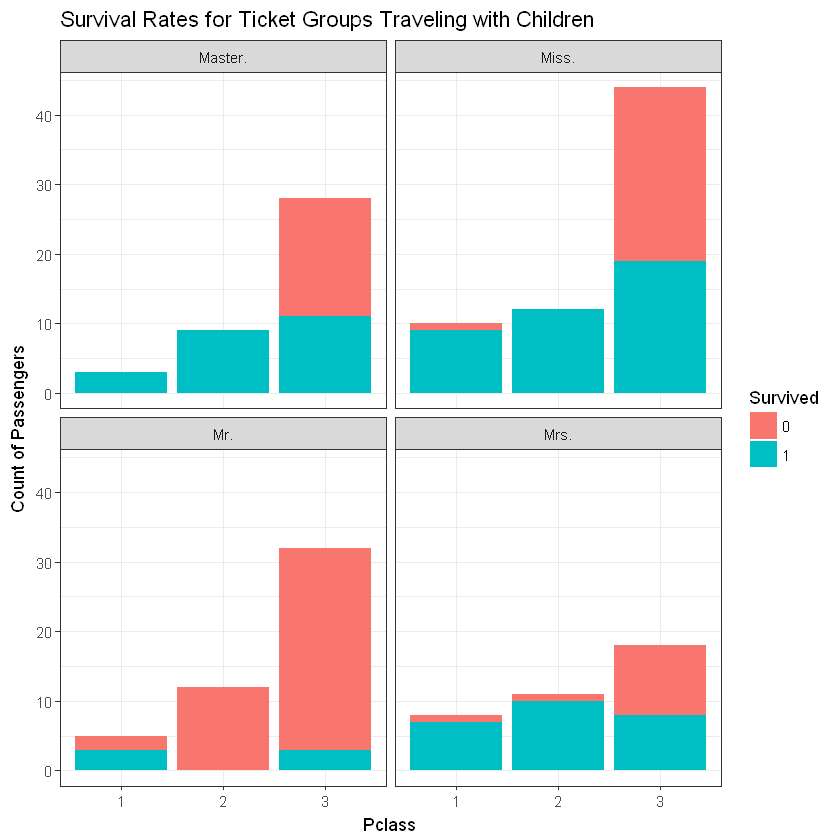

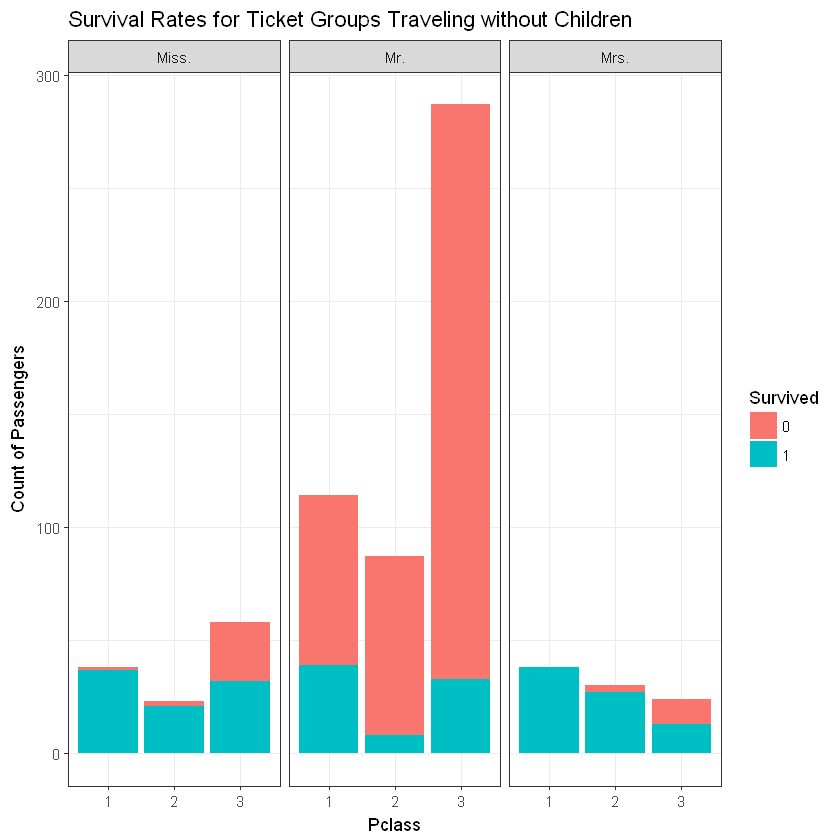

In [55]:

#======================================================================
# The payoff - Investigate the hypothesis that traveling with children
#              might be predictive.
#
library(ggplot2)

# Set up factors
train$Survived <- as.factor(train$Survived)
train$Pclass <- as.factor(train$Pclass)

# Subset
tickets.children <- train %>%
  filter(Child.Count > 0)

# Visualize
ggplot(tickets.children, aes(x = Pclass, fill = Survived)) +
  theme_bw() +
  geom_bar() +
  facet_wrap(~ Title) +
  labs(y = "Count of Passengers",
       title = "Survival Rates for Ticket Groups Traveling with Children")

# Subset
tickets.no.children <- train %>%
  filter(Child.Count == 0)

# Visualize
ggplot(tickets.no.children, aes(x = Pclass, fill = Survived)) +
  theme_bw() +
  geom_bar() +
  facet_wrap(~ Title) +
  labs(y = "Count of Passengers",
       title = "Survival Rates for Ticket Groups Traveling without Children")